# **LOAD GRADCAM**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
import matplotlib.pyplot as plt

import numpy as np
import argparse
import imutils
import cv2
from gradcam import GradCAM

[INFO] loading model...
[INFO] standard_poodle: 64.15%


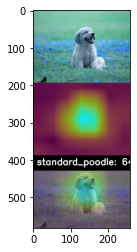

In [ ]:
#Model = ResNet50
Model = VGG16
# load the pre-trained CNN from disk
print("[INFO] loading model...")
model = Model(weights="imagenet")

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
#orig = cv2.imread(args["image"])
img_path = "d.jpg"
orig = cv2.imread(img_path)

resized = cv2.resize(orig, (224, 224))

# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = load_img(img_path, target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = model.predict(image)
i = np.argmax(preds[0])

# decode the ImageNet predictions to obtain the human-readable label
decoded = imagenet_utils.decode_predictions(preds)
(imagenetID, label, prob) = decoded[0][0]
label = "{}: {:.2f}%".format(label, prob * 100)
print("[INFO] {}".format(label))

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
	0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
#plt.subplot(311)
#plt.subplot(312)
#plt.subplot(313)
#plt.imshow(orig)
#plt.imshow(heatmap)
#plt.imshow(output)
#plt.show()
output = np.vstack([orig, heatmap, output])
plt.imshow(output)
#output = imutils.resize(output, height=700)
